# Wien Bridge Oscillator
Last update: 29 July 2025

:::{.callout-note}  
Some of the narration was generated by Google Gemini, then modified by me.  
:::

## Introduction
This chapter is about a type of electronic oscillator called a Wien Bridge Oscillator. An electronic oscillator is a circuit that converts a direct current power source into an alternating current signal. Essentially, it generates a periodic, repetitive electrical signal. A [Wien Bridge oscillator](https://en.wikipedia.org/wiki/Wien_bridge_oscillator) uses a frequency selective bridge circuit as the topology for the oscillator. The bridge circuit was originally developed by [Max Wien](https://en.wikipedia.org/wiki/Max_Wien) in 1891 for impedance measurements. The bridge circuit consists of four resistors and two capacitors.

Studying electronic oscillators is fundamental for anyone wanting to learn about electronics. Oscillators are examples of circuits that utilize positive feedback. Many oscillators rely on resonant circuits (LC tanks or crystal resonators) to determine their frequency. Studying oscillators introduces concepts like frequency stability, phase noise and harmonic distortion, which are crucial for designing high-performance electronic systems. Understanding different oscillator types (RC, LC, crystal, VCOs, etc.) helps in selecting the right component for a specific application based on requirements for frequency range, stability, cost and power consumption.

The use of MNA and Python can enable easy symbolic and numerical analysis of Wien Bridge oscillators.

![Schematic of a Wien Bridge Oscillator drawn in a bridge configuration.](wien_bridge_v0.png){#fig-wien_bridge_v0_sch}

## Circuit Description
The circuit in @fig-wien_bridge_v0_sch is a Wien Bridge oscillator drawn to emphasize the bridge topology. A bridge circuit is a type of electrical circuit topology where two circuit branches are "bridged" by a third branch connected between them at an intermediate point. It's often visualized as an "H" or diamond shape. A bridge circuit essentially consists of two parallel voltage dividers sharing a common power source. A third branch, often containing a galvanometer (a sensitive current meter) or a voltmeter, connects the midpoints of these two voltage dividers. The key to many bridge circuits is the "balance" or "null" condition. When the bridge is balanced, the voltage potential at the midpoints of the two parallel branches is equal, meaning no current flows through the bridging branch (or the voltage difference across it is zero).

The element values in the schematic have all been set to 1; in @sec-design-example, the element values will be determined. The components $R_1$, $R_2$ and $C_1$ and $C_2$ do not need to be of equal value, but if they are, some of the analysis is simplified. The circuit above is missing the amplitude stabilizing elements that are usually included in real world implementations of the Wien Bridge oscillator. See @sec-ltspice-simulation for a version of an actual implementation. 

The following Python modules are used in this JupyterLab notebook.

In [1]:
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
from tabulate import tabulate
init_printing()

## Network Equations
The netlist for the schematic above was generated by LTSpice and copied into the cell below.

In [3]:
Wien_bridge_v0_net_list = '''
* Wien bridge oscillator v0.asc
O1 4 2 1
R4 4 1 1
R1 0 2 1
R3 0 4 1
R2 2 3 1
C2 3 1 1
C1 0 2 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [4]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(Wien_bridge_v0_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [5]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = - C_{2} s v_{3} + I_{O1} + v_{1} \left(C_{2} s + \frac{1}{R_{4}}\right) - \frac{v_{4}}{R_{4}}$<br>$0 = v_{2} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}}$<br>$0 = - C_{2} s v_{1} + v_{3} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{2}}$<br>$0 = v_{4} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{1}}{R_{4}}$<br>$0 = - v_{2} + v_{4}$<br>

There is no independent voltage or current source in the circuit, so all the node voltages are zero.

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [6]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

## Open Loop Analysis
The analysis presented here follows the same steps that can be found in @Budak1974. While most sophisticated control systems are closed-loop (meaning they use feedback), open-loop analysis is incredibly important for several reasons. The open-loop transfer function ($G(s)H(s)$ or just $G(s)$ if $H(s)=1$) represents the inherent dynamics of the system you are trying to control. By analyzing the open-loop circuit you can understand how the circuit responds to inputs without any corrective action from a feedback loop. This tells you about its natural gain, phase shift, time delays and stability characteristics in isolation. It helps in identifying poles and zeros that are inherent to the system.

The circuit shown below is the open loop Wien Bridge circuit. $V_1$ is the output of the Op Amp that drives the frequency selective parts of the oscillator and the value of $V_1$ is K. The element values have been set to 1 because we are doing a symbolic solution to start with.

![Schematic used for loop calculations](wien_bridge_loop_gain.png){#fig-wien_bridge_loop_gain_sch}

The netlist below was exported from LTSpice. 

In [7]:
Wien_bridge_loop_gain_net_list = '''
* Wien bridge loop gain.asc
R2 3 2 1
R1 2 0 1
C1 2 0 1
C2 1 3 1
V1 1 0 1
'''

The MNA equations are generated from the function `SymMNA.smna`.

In [8]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(Wien_bridge_loop_gain_net_list)

The code below assembles the network equations from the MNA matrices and displays the equations.

In [9]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = C_{2} s v_{1} - C_{2} s v_{3} + I_{V1}$<br>$0 = v_{2} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{2}}$<br>$0 = - C_{2} s v_{1} + v_{3} \left(C_{2} s + \frac{1}{R_{2}}\right) - \frac{v_{2}}{R_{2}}$<br>$V_{1} = v_{1}$<br>

The free symbols are entered as SymPy variables and the element values are put into a dictionary.

In [10]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))
element_values = SymMNA.get_part_values(network_df)

#### Symbolic solution
The network equations for the circuit in @fig-wien_bridge_loop_gain_sch can be solved symbolically. 

In [11]:
U_sym = solve(NE_sym,X)

Display the node voltages and dependent currents using symbolic notation.

In [12]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{2} R_{1} V_{1} s}{C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} R_{1} s + C_{2} R_{2} s + 1}$<br>$v_{3} = \frac{C_{1} C_{2} R_{1} R_{2} V_{1} s^{2} + C_{2} R_{1} V_{1} s + C_{2} R_{2} V_{1} s}{C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} R_{1} s + C_{2} R_{2} s + 1}$<br>$I_{V1} = \frac{- C_{1} C_{2} R_{1} V_{1} s^{2} - C_{2} V_{1} s}{C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} R_{1} s + C_{2} R_{2} s + 1}$<br>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$ is:

In [13]:
H_sym = (U_sym[v2]/U_sym[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H_sym)))

$H(s)=\frac{C_{2} R_{1} s}{C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} R_{1} s + C_{2} R_{2} s + 1}$

The numerator is a first order polynomial and the denominator is a second order polynomial. Generally, the order of the dominator is equal to the number of reactive elements in the circuit; sometimes roots of the numerator will exactly cancel with a root of the denominator polynomial. The roots of the numerator polynomial are called the zeros of the transfer function and the roots of the denominator are called the poles of the transfer function.

In [14]:
H_sym_num, H_sym_denom = fraction(H_sym,s) #returns numerator and denominator

#### Numerator Polynomial of $H_{sym}(s)$
The numerator polynomial is:

In [15]:
Markdown('$N(s)={:s}$'.format(latex(H_sym_num)))

$N(s)=C_{2} R_{1} s$

The coefficients of each Laplace term can be equated to the variables $b_2$, $b_1$ and $b_0$ in the expression: 

$b_2s^{2}+b_1s+b_0$

where $b_2$, $b_1$ and $b_0$ are:

In [16]:
b2 = H_sym_num.coeff(s**2)
b1 = H_sym_num.coeff(s**1)
b0 = (H_sym_num - b1*s*1 - b2*s**2).expand()

Markdown('<p>$b_2={:s}$</p><p>$b_1={:s}$</p><p>$b_0={:s}$</p>'.format(latex(b2),latex(b1),latex(b0)))

<p>$b_2=0$</p><p>$b_1=C_{2} R_{1}$</p><p>$b_0=0$</p>

The roots of the numerator polynomial can easily be found by inspection. There is only one root and the value is zero.

#### Denominator Polynomial of $H_{sym}(s)$
The denominator polynomial of the transfer function is called the characteristic polynomial. The roots of the denominator, also called poles of the system,  determine the system's stability. If any of these roots have a positive real part, the system is unstable, meaning its output will grow unbounded. The roots also influence how the system responds to changes in input (the transient response). They affect things like how quickly the system settles to a new state, whether it oscillates, and the damping of those oscillations. Each root of the characteristic polynomial corresponds to a natural mode of the system.

The denominator polynomial is:

In [17]:
Markdown('$D(s)={:s}$'.format(latex(H_sym_denom)))

$D(s)=C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} R_{1} s + C_{2} R_{2} s + 1$

The coefficients of each Laplace term can be equated to the variables $a_3$, $a_2$, $a_1$ and $a_0$ in the expression: 

$a_2s^2+a_1s+a_0$

where $a_2$, $a_1$ and $a_0$ are:

In [18]:
a2 = H_sym_denom.coeff(s**2)
a1 = H_sym_denom.coeff(s**1)
a0 = (H_sym_denom - a1*s*1 - a2*s**2).expand()
Markdown('<p>$a_2={:s}$</p><p>$a_1={:s}$</p><p>$a_0={:s}$</p>'.format(latex(a2),latex(a1),latex(a0)))

<p>$a_2=C_{1} C_{2} R_{1} R_{2}$</p><p>$a_1=C_{1} R_{1} + C_{2} R_{1} + C_{2} R_{2}$</p><p>$a_0=1$</p>

The roots of the denominator polynomial, which are the poles of the transfer function, can be found with SymPy.

In [19]:
denom_root_sym = solve(H_sym_denom,s)

Markdown('There are {:d} poles, which are: <p>$p_0={:s}$</p><p>$p_1={:s}$</p>'.format(len(denom_root_sym),latex(denom_root_sym[0]),latex(denom_root_sym[1])))

There are 2 poles, which are: <p>$p_0=\frac{- C_{1} R_{1} - C_{2} R_{1} - C_{2} R_{2} - \sqrt{C_{1}^{2} R_{1}^{2} + 2 C_{1} C_{2} R_{1}^{2} - 2 C_{1} C_{2} R_{1} R_{2} + C_{2}^{2} R_{1}^{2} + 2 C_{2}^{2} R_{1} R_{2} + C_{2}^{2} R_{2}^{2}}}{2 C_{1} C_{2} R_{1} R_{2}}$</p><p>$p_1=\frac{- C_{1} R_{1} - C_{2} R_{1} - C_{2} R_{2} + \sqrt{C_{1}^{2} R_{1}^{2} + 2 C_{1} C_{2} R_{1}^{2} - 2 C_{1} C_{2} R_{1} R_{2} + C_{2}^{2} R_{1}^{2} + 2 C_{2}^{2} R_{1} R_{2} + C_{2}^{2} R_{2}^{2}}}{2 C_{1} C_{2} R_{1} R_{2}}$</p>

$H(s)$ is a band pass function. We can find $\omega_n$ and Q.

In [20]:
omega_n = sqrt(a0/a2)
Markdown('The natural frequency is: ${:s}$'.format(latex(omega_n)))

The natural frequency is: $\sqrt{\frac{1}{C_{1} C_{2} R_{1} R_{2}}}$

In [21]:
BW = (a1/a2)
Markdown('The bandwidth is: ${:s}$'.format(latex(BW)))

The bandwidth is: $\frac{C_{1} R_{1} + C_{2} R_{1} + C_{2} R_{2}}{C_{1} C_{2} R_{1} R_{2}}$

In [22]:
quality_factor = omega_n/BW
Markdown('The Q is: ${:s}$'.format(latex(quality_factor)))

The Q is: $\frac{C_{1} C_{2} R_{1} R_{2} \sqrt{\frac{1}{C_{1} C_{2} R_{1} R_{2}}}}{C_{1} R_{1} + C_{2} R_{1} + C_{2} R_{2}}$

According to @Budak1974, the 3 dB bandwidth of the loop gain is more than $2\omega_n$. Most often R's and C's are made the same so $BW=3\omega_n$. Accordingly, the frequency selectivity is somewhat poor.

### Characteristic Equation
The Wien bridge oscillator has positive feedback provided by the RC components $R_1$, $R_2$, $C_1$ and $C_2$. Including K as the gain term, the characteristic equation becomes $1 - KH(s) = 0$. The roots of the characteristic equation dictate the circuit's stability. For stable positive feedback, oscillation requires the roots of $1 - G(s)H(s) = 0$ to have zero real parts.

We can define a new symbol, K, to be the gain of the Op Amp determined by $R_3$ and $R_4$ in @fig-wien_bridge_v0_sch.

In [23]:
K = symbols('K')

In [24]:
Markdown('The characteristic equation is: ${:s}$'.format(latex(1-K*H_sym)))

The characteristic equation is: $- \frac{C_{2} K R_{1} s}{C_{1} C_{2} R_{1} R_{2} s^{2} + C_{1} R_{1} s + C_{2} R_{1} s + C_{2} R_{2} s + 1} + 1$

We can solve for the roots of the characteristic equation.

In [25]:
roots_char_equ = solve(1-K*H_sym,s)
Markdown('There are {:d} roots, which are: <p>$p_0={:s}$</p><p>$p_1={:s}$</p>'.format(len(roots_char_equ),latex(roots_char_equ[0]),latex(roots_char_equ[1])))

There are 2 roots, which are: <p>$p_0=\frac{- C_{1} R_{1} + C_{2} K R_{1} - C_{2} R_{1} - C_{2} R_{2} - \sqrt{C_{1}^{2} R_{1}^{2} - 2 C_{1} C_{2} K R_{1}^{2} + 2 C_{1} C_{2} R_{1}^{2} - 2 C_{1} C_{2} R_{1} R_{2} + C_{2}^{2} K^{2} R_{1}^{2} - 2 C_{2}^{2} K R_{1}^{2} - 2 C_{2}^{2} K R_{1} R_{2} + C_{2}^{2} R_{1}^{2} + 2 C_{2}^{2} R_{1} R_{2} + C_{2}^{2} R_{2}^{2}}}{2 C_{1} C_{2} R_{1} R_{2}}$</p><p>$p_1=\frac{- C_{1} R_{1} + C_{2} K R_{1} - C_{2} R_{1} - C_{2} R_{2} + \sqrt{C_{1}^{2} R_{1}^{2} - 2 C_{1} C_{2} K R_{1}^{2} + 2 C_{1} C_{2} R_{1}^{2} - 2 C_{1} C_{2} R_{1} R_{2} + C_{2}^{2} K^{2} R_{1}^{2} - 2 C_{2}^{2} K R_{1}^{2} - 2 C_{2}^{2} K R_{1} R_{2} + C_{2}^{2} R_{1}^{2} + 2 C_{2}^{2} R_{1} R_{2} + C_{2}^{2} R_{2}^{2}}}{2 C_{1} C_{2} R_{1} R_{2}}$</p>

For the oscillator to run and be stable, the roots need to be imaginary with a real part equal to zero. From the expressions for the roots, we can see that the real part of the roots will be zero if $-C_1R_1 + C_2KR_1 - C_2R_1 - C_2R_2=0$. This is called the critical value, $K_c$. If $K \lt K_c$, the roots are in the left hand complex frequency plane and oscillations will not be sustained. If $K \gt K_c$, the oscillations will grow and the amplitude will exceed the dynamic range of the Op Amp. Maintaining the exact value of $K_c$ is not possible in the real world and the circuit in @fig-wien_bridge_v1_sch is one example of a realistic circuit.  

We can solve this expression to determine the component values to make the real part zero.

In [26]:
Markdown('Solving for K, we get: K = ${:s}$'.format(latex(solve(-C1*R1 + C2*K*R1 - C2*R1 - C2*R2,K))))

Solving for K, we get: K = $\left[ \frac{C_{1}}{C_{2}} + 1 + \frac{R_{2}}{R_{1}}\right]$

If we substitute the expression for K back into the characteristic equation we get a set of imaginary poles.

In [27]:
roots_char_equ = solve((1-K*H_sym).subs({K:1+R2/R1+C1/C2}),s)
Markdown('There are {:d} roots, which are: <p>$p_0={:s}$</p><p>$p_1={:s}$</p>'.format(len(roots_char_equ),latex(roots_char_equ[0]),latex(roots_char_equ[1])))

There are 2 roots, which are: <p>$p_0=- \sqrt{- \frac{1}{C_{1} C_{2} R_{1} R_{2}}}$</p><p>$p_1=\sqrt{- \frac{1}{C_{1} C_{2} R_{1} R_{2}}}$</p>

Thus, with the gain, $K=1+R_2/R_1+C_1/C_2$, we get two imaginary roots.

## Design Example {#sec-design-example}
For the example design, we want the Wien Bridge oscillator to have a frequency of 1kHz. If we let $R=R_1=R_2$ and $C_1 = C_2 = 0.1\mu F$, we can solve for $R$.

First we declare a new symbol, $R$.

In [28]:
R = symbols('R')

The expression for the natural frequency was obtained from the characteristic polynomial.

In [29]:
Markdown('The expression for the natural frequency is: $\omega_n={:s}$'.format(latex(omega_n)))

The expression for the natural frequency is: $\omega_n=\sqrt{\frac{1}{C_{1} C_{2} R_{1} R_{2}}}$

After making some substitutions, we can solve for $R$; we get the numerical value for R.

In [30]:
R = solve(omega_n.subs({C1:0.1e-6,C2:0.1e-6,R1:R,R2:R})-2*np.pi*1e3,R)[1]
Markdown('R = ${:s}$'.format(latex(R)))

R = $1591.54943091895$

We can update the element values as follows:

In [31]:
element_values[R1] = R
element_values[R2] = R
element_values[C1] = 0.1e-6
element_values[C2] = 0.1e-6

If we substitute these values into the expression for K, we get:

In [32]:
Markdown('K = ${:s}$'.format(latex((1+C1/C2+R2/R1).subs(element_values))))

K = $3.0$

K, which is the gain of the Op Amp is $K=1+R_4/R_3$. If we choose $R_3=1k\Omega$ and solve for $R_4$, we get:

In [33]:
K = 1+R4/R3
solve(K.subs({R3:1e3})-3,R4)[0]
Markdown('R4 = ${:s}$'.format(latex(solve(K.subs({R3:1e3})-3,R4)[0])))

R4 = $2000.0$

We can update the element values for $R_3$ and $R_4$.

In [34]:
element_values[R3] = 1e3
element_values[R4] = 2e3

### Numerical Solution
The network equations can be numerically solved when the element values are included in the calculations.

In [35]:
equ_N = NE_sym.subs(element_values)

We get the following numerical network equations:

In [38]:
temp = ''
for i in range(shape(equ_N.lhs)[0]):
    temp += '<p>${:s} = {:s}$</p>'.format(latex(equ_N.rhs[i]),
        latex(equ_N.lhs[i]))

Markdown(temp)

<p>$0 = I_{V1} + 1.0 \cdot 10^{-7} s v_{1} - 1.0 \cdot 10^{-7} s v_{3}$</p><p>$0 = v_{2} \cdot \left(1.0 \cdot 10^{-7} s + 0.00125663706143592\right) - 0.000628318530717959 v_{3}$</p><p>$0 = - 1.0 \cdot 10^{-7} s v_{1} - 0.000628318530717959 v_{2} + v_{3} \cdot \left(1.0 \cdot 10^{-7} s + 0.000628318530717959\right)$</p><p>$1.0 = v_{1}$</p>

SymPy can solve for unknown node voltages and the unknown currents from the independent voltage source, $V_1$. The node voltages and unknown current is:

In [39]:
U = solve(equ_N,X)

temp = ''
for i in U.keys():
    temp += '<p>${:s} = {:s}$</p>'.format(latex(i),latex(U[i]))

Markdown(temp)

<p>$v_{1} = 1.0$</p><p>$v_{2} = \frac{6.28318530717959 \cdot 10^{25} s}{1.0 \cdot 10^{22} s^{2} + 1.88495559215388 \cdot 10^{26} s + 3.94784176043576 \cdot 10^{29}}$</p><p>$v_{3} = \frac{1.0 \cdot 10^{22} s^{2} + 1.25663706143592 \cdot 10^{26} s}{1.0 \cdot 10^{22} s^{2} + 1.88495559215388 \cdot 10^{26} s + 3.94784176043576 \cdot 10^{29}}$</p><p>$I_{V1} = \frac{- 6.28318530717959 \cdot 10^{25} s^{2} - 3.94784176043576 \cdot 10^{29} s}{1.0 \cdot 10^{29} s^{2} + 1.88495559215388 \cdot 10^{33} s + 3.94784176043576 \cdot 10^{36}}$</p>

The network transfer function, $H(s)=\frac {v_2(s)}{v_1(s)}$, is:

In [40]:
H = (U[v2]/U[v1]).cancel()
Markdown('$H(s)={:s}$'.format(latex(H)))

$H(s)=\frac{6.28318530717959 \cdot 10^{25} s}{1.0 \cdot 10^{22} s^{2} + 1.88495559215388 \cdot 10^{26} s + 3.94784176043576 \cdot 10^{29}}$

### Characteristic Equation
In control systems engineering, the characteristic equation is a fundamental algebraic equation that plays a crucial role in understanding and analyzing the behavior, and most importantly, the stability of a dynamic system. The value $k=3$ was determined above. The roots of the characteristic equation directly reveal critical information about the system's dynamic response and stability. The roots of the characteristic equation are the poles of the closed-loop system. If a pair of roots lies exactly on the imaginary axis (with zero real part), the system is marginally stable. This usually means the system will oscillate continuously without decaying or growing.

The `solve` function can determine the roots of the characteristic equation. 

In [41]:
char_equ_roots = solve(1-3*H,s)
Markdown('There are {:d} imaginary roots at, {:,.0f}$j\omega$ Hz and {:,.0f}$j\omega$ Hz.'.format(len(char_equ_roots),complex(char_equ_roots[0]/(2*np.pi)).imag,complex(char_equ_roots[1]/(2*np.pi)).imag))

There are 2 imaginary roots at, -1,000$j\omega$ Hz and 1,000$j\omega$ Hz.

### Feedback Transfer Function
The feedback transfer function of @fig-wien_bridge_loop_gain_sch is $H_{sym}(s)=\frac {v_2(s)}{v_1(s)}$. The magnitude and phase response is plotted below.

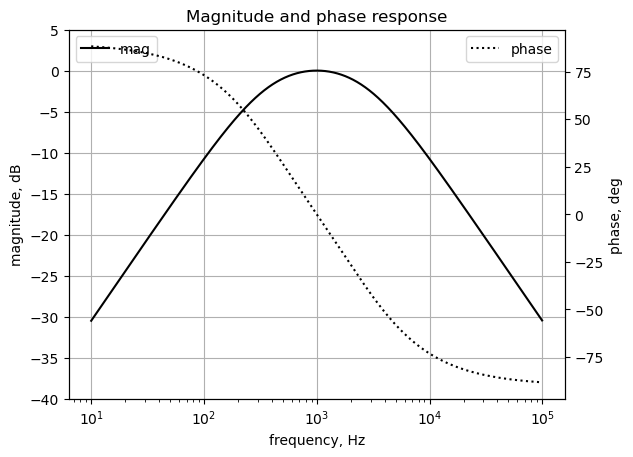

In [42]:
H_num, H_denom = fraction(3*H) #returns numerator and denominator

# convert symbolic to NumPy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)

sys_tf = signal.TransferFunction(a,b)

# setup
x_axis = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi

# plot
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'k'

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

w, mag, phase = signal.bode((a, b), w=x_axis) # returns: rad/s, mag in dB, phase in deg

# plot the magnitude and phase
ax1.semilogx(w/(2*np.pi), mag,'-k',label='mag')    # magnitude plot
ax2.semilogx(w/(2*np.pi), phase,':k',label='phase')  # phase plot

ax1.set_ylim((-40,5))

# position legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid()
plt.title('Magnitude and phase response')
plt.show()

The band pass nature of the feedback transfer function limits the oscillation frequency to $\omega_n$.

## LTSpice Simulation {#sec-ltspice-simulation}
The circuit shown below is an example of a Wien Bridge oscillator with standard component values and amplitude stabilizing components consisting of $R_5$, $D_1$ and $D_2$. There are many other examples of Wien Bridge oscillators online. 

![Schematic used for LTSpice.](wien_bridge_v1.png){#fig-wien_bridge_v1_sch}

The circuit above is from @Franco2002, Figure 10.3 (a). The component values were chosen from the design example above. The value for $R_4$ was chosen a bit higher to keep the poles in the right hand plane over tolerance and temperature variations. This circuit can be simulated in LTSpice with the following file.

```
* Wien bridge oscillator v1.asc
XU1 4 2 1 opamp Aol=100K GBW=10Meg
R4 1 4 2.1k
R2 3 2 1.58k
R1 2 0 1.58k
R3 4 0 1k
C1 2 0 0.1µ
C2 1 3 0.1µ
D1 4 5 1N914
D2 5 4 1N914
R5 5 1 100
.model D D
.lib standard.dio
.lib opamp.sub
.tran 0.1s
.ic V(2)=0.01
.backanno
.end
```

## Summary
This notebook has presented some of the analysis and calculations for the design of a Wien Bridge oscillator using Python and MNA. Oscillators are networks that produce a pair of imaginary axis poles. When a circuit has poles exactly on the imaginary axis (e.g., at $j\omega_0$ and $-j\omega_0$), it means that the system will exhibit a sustained, undamped oscillation at the frequency $\omega_0$. There is no exponential decay or growth; the oscillations continue indefinitely. Oscillators are designed with positive feedback loops. This positive feedback, along with specific gain and phase conditions, put the system's poles onto the imaginary axis. Without this positive feedback, the poles would typically be in the left half of the s-plane (leading to stable, decaying responses).